# 1. Introdução
***

O sucesso financeiro de um negócio está intrinsecamente ligado aos seus clientes. Isso significa que, se um determinado negócio não possui um mercado consumidor, ele não conseguirá se manter em funcionamento. Em outras palavras, um dos principais objetivos de qualquer empreendimento é atrair novos clientes e manter os clientes existentes satisfeitos, a fim de reduzir a taxa de perda de clientes, conhecida como churn.

Os clientes são a alma de todo negócio, pois são eles que impulsionam o crescimento e a lucratividade. Eles são a fonte de receita e representam a demanda por produtos ou serviços oferecidos pela empresa. Portanto, entender as necessidades, desejos e preferências dos clientes é fundamental para o sucesso de qualquer negócio.

Portanto, essa análise visa identificar as característica dos clientes ideais de uma loja imaginativa.

O dataset em estudo, contém as seguintes informações dos clientes:

* **Customer ID:** Identificador único do cliente.
* **Gender:** Sexo do cliente.
* **Age:** Idade do cliente.
* **Annual Income:** Rendimento anual do cliente.
* **Spending Score:** Pontuação atribuída pela loja, com base no comportamento do cliente e na natureza do gasto.
* **Profession:** Profissão do cliente.
* **Work Experience:** Anos de experiência do cliente, em anos.
* **Family Size:** Número de membros da familia.


Dataset disponível em: [Shop Customer Data](https://www.kaggle.com/datasets/datascientistanna/customers-dataset)

# 2. Carregar Bibliotecas e Definição de Configurações Padrões
***

In [1]:
# Ocultar avisos
import warnings
warnings.simplefilter('ignore')

# Manipulação de dados
import pandas as pd
import numpy as np
# !pip install sidetable
import sidetable as stb

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções Estatísticas 
from scipy.stats import skew

In [2]:
# Configurando parâmetros do Pandas
pd.set_option('display.max_rows', 22)
pd.set_option('display.max_columns', 40)
pd.set_option('display.precision', 2)

# Configurando parâmetros do matplotlib
co1 = 'gray'

plt.rcParams['axes.edgecolor'] = co1
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.titlecolor'] = co1
plt.rcParams['axes.labelcolor'] = co1
plt.rcParams['xtick.color'] = co1
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.color'] = co1
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['legend.labelcolor'] = co1
plt.rcParams['figure.titlesize'] = 18

In [3]:
# Configuração das fonte de letras
font_options = {'family' : 'Arial', 'weight' : 'normal', 'size' : 10}
plt.rc ('font', **font_options)

font_sup_title = {'family':'Arial','color':'gray','size':18}
font_title = {'family':'Arial','color':'gray','size':15}
font_label = {'family':'Arial','color':'gray','size':12}

# Importanto paleta de cores
cmap_blue = plt.get_cmap('Blues')
cmap_gray = plt.get_cmap('Greys')
cmap_orange = plt.get_cmap('Oranges')
cmap_greens = plt.get_cmap('Greens')

# 3. Análise Exploratória
---

## 3.1 Explorando o Dataset

In [4]:
#  Carregar o Dataset
customer = pd.read_csv('dataset/Customers.csv')
customer.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
nrows, ncols = customer.shape
print(f'O dataset tem {nrows} registros e {ncols} colunas.')

O dataset tem 2000 registros e 8 colunas.


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
customer.stb.missing()

,missing,total,percent
Profession,35,2000,1.75
CustomerID,0,2000,0.00
Gender,0,2000,0.00
Age,0,2000,0.00
Annual Income ($),0,2000,0.00
Spending Score (1-100),0,2000,0.00
Work Experience,0,2000,0.00
Family Size,0,2000,0.00


In [8]:
customer.drop("CustomerID", axis=1).describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,48.96,28.43,0.0,25.0,48.0,73.00,99.0
Annual Income ($),2000.0,110731.82,45739.54,0.0,74572.0,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,50.96,27.93,0.0,28.0,50.0,75.00,100.0
Work Experience,2000.0,4.10,3.92,0.0,1.0,3.0,7.00,17.0
Family Size,2000.0,3.77,1.97,1.0,2.0,4.0,5.00,9.0


In [9]:
customer.describe(include=['object']).T

,count,unique,top,freq
Gender,2000,2,Female,1186
Profession,1965,9,Artist,612


In [10]:
customer.nunique().sort_values()

Gender                       2
Profession                   9
Family Size                  9
Work Experience             18
Age                        100
Spending Score (1-100)     101
Annual Income ($)         1786
CustomerID                2000
dtype: int64

In [11]:
# Sexo do clientes
customer.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [12]:
# Valores únicos das Profissões dos clientes
customer.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [13]:
# Quantidade de membros na familia dos clientez
customer['Family Size'].unique()

array([4, 3, 1, 2, 6, 5, 8, 7, 9], dtype=int64)

In [14]:
# Valores únicos dos Anos de experiência dos clientes
customer['Work Experience'].unique()

array([ 1,  3,  0,  2,  4,  9, 12, 13,  5,  8, 14,  7,  6, 10, 11, 15, 16,
       17], dtype=int64)

In [15]:
print(sorted(customer.Age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [16]:
customer['Spending Score (1-100)'].unique()

array([ 39,  81,   6,  77,  40,  76,  94,   3,  72,  14,  99,  15,  13,
        79,  35,  66,  29,  98,  73,   5,  82,  32,  61,  31,  87,   4,
        92,  17,  26,  75,  36,  28,  65,  55,  47,  42,  52,  60,  54,
        45,  41,  50,  46,  51,  56,  59,  48,  49,  53,  44,  57,  58,
        43,  91,  95,  11,   9,  34,  71,  88,   7,  10,  93,  12,  97,
        74,  22,  90,  20,  16,  89,   1,  78,  83,  27,  63,  86,  69,
        24,  68,  85,  23,   8,  18,   0,  33,  70,  37,  64,  30,  96,
         2,  38,  21,  84,  62,  80, 100,  67,  19,  25], dtype=int64)

In [17]:
print(sorted(customer['Annual Income ($)'].unique())[:100])
print('\n',sorted(customer['Annual Income ($)'].unique())[-100:])

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 50076, 50223, 50250, 50396, 50418, 50429, 50526, 50550, 50798, 51000, 51166, 51199, 51260, 51416, 51468, 51604, 51661, 51700, 51733, 51742, 51860, 51866, 52000, 52152, 52234, 52326, 52374, 52543, 52590, 52648, 52661, 52727, 52884, 53002, 53097, 53231, 53306, 53392, 53452, 53500, 53509, 53552, 53622, 53788, 53802, 53812, 53832, 53927, 54000, 54121]

 [182410, 182580, 182631, 182748, 182871, 182910, 182927, 182937, 183071, 183201, 183217, 183282, 183339, 183540, 183548, 183643, 183783, 183851, 184060, 184088, 184222, 184324, 184387, 184408, 184426, 184443, 184481, 184522, 184628, 184639, 184736, 184771, 184801, 184813, 184815, 184830, 184838, 184844, 18506

OBSERVAÇÕES:

> 1. Apenas a coluna de Profissão possui valores ausentes.
> 2. A maioria dos clientes são mulheres.
> 3. A profissão mais comum é a de Artista.


## 3.2 Data clearing

* Como o dataset possui valores ausentes apenas em uma coluna e é um percentual baixo, irei remover essas linhas.

In [18]:
nrow_antes, ncols_antes = customer.shape
print(f'Antes: \nNº de registros: {nrow_antes} \nNº de colunas: {ncols_antes}', end='\n\n')
customer.dropna(axis=0, inplace=True, how='any')

nrow_depois, ncols_depois = customer.shape
print(f'Depois: \nNº de registros: {nrow_depois} \nNº de colunas: {ncols_depois}')

Antes: 
Nº de registros: 2000 
Nº de colunas: 8

Depois: 
Nº de registros: 1965 
Nº de colunas: 8


In [19]:
customer.stb.missing()

,missing,total,percent
CustomerID,0,1965,0.0
Gender,0,1965,0.0
Age,0,1965,0.0
Annual Income ($),0,1965,0.0
Spending Score (1-100),0,1965,0.0
Profession,0,1965,0.0
Work Experience,0,1965,0.0
Family Size,0,1965,0.0


In [20]:
# Verificar de possui cliente abaixo de 18 anos
customer[customer.Age < 18]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
202,203,Female,16,60000,0,Engineer,6,8
210,211,Female,1,57000,93,Engineer,1,2
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
229,230,Male,15,94000,30,Healthcare,7,2
...,...,...,...,...,...,...,...,...
1974,1975,Female,14,153145,59,Healthcare,8,6
1979,1980,Male,0,165321,93,Doctor,8,1
1980,1981,Female,10,86925,76,Artist,7,2
1984,1985,Female,2,153622,51,Lawyer,6,6


In [21]:
# Verificar de possui cliente acima de 100 anos
customer[customer.Age > 100]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size


In [22]:
# Não faz sentido temos clientes tão novos como profissão, anos de experiência de trabalho e com filhos.
# Logo, imagina-se que a informação foi passada de forma equivocada

p_menor_18 = (customer.Age < 18).sum()/ customer.Age.count()
print(f'Temos, aproximadamente, {p_menor_18:.2%} de clientes com idade errada. Logo, vamos substituir pela mediana das idades de sua respectiva profissão')

Temos, aproximadamente, 16.64% de clientes com idade errada. Logo, vamos substituir pela mediana das idades de sua respectiva profissão


In [23]:
# Pegando a mediana das idades por profissão
median_age_by_profession = customer.groupby('Profession')['Age'].median()
dic_median_age_by_profession = median_age_by_profession.to_dict()
dic_median_age_by_profession

{'Artist': 47.0,
 'Doctor': 48.0,
 'Engineer': 58.0,
 'Entertainment': 50.0,
 'Executive': 45.0,
 'Healthcare': 47.0,
 'Homemaker': 41.0,
 'Lawyer': 48.0,
 'Marketing': 38.0}

In [24]:
# Função para preencher valores menores que 18 com a mediana da profissão
def fill_age(row):
    if row['Age'] < 18:
        return median_age_by_profession[row['Profession']]
    else:
        return row['Age']

# Preencha os valores menores que 18 na coluna "Age" com a mediana das iades de sua correspondente profissão.
customer['Age'] = customer.apply(fill_age, axis=1)

# Verifique se os valores foram preenchidos corretamente
customer[customer.Age < 18]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size


OBSERVAÇÕES:

> 1. Os registros que possuiam pelos menor um valor ausente, foram removidos.
> 2. Substitui as idades, teoricamente, erradas pela mediana das idades de sua, respectiva, profissão.

## 3.3 Análise Univariada

* **Como as variáveis estão distribuidas?**

In [25]:
# Total de clientes por gênero
customer.Gender.value_counts()    # Female: 59%
                                  #   Male: 41%

Female    1166
Male       799
Name: Gender, dtype: int64

In [26]:
# Total de clientes por profissão
frequencia = customer.Profession.value_counts()
percente = customer.Profession.value_counts(1)

print('{:7}| {:18}| {:6}|{}'.format('Position', 'Profission', 'Count', 'Percente'))
print(23 * '--')
for i, value in enumerate(frequencia.index):
    print('{:^8}| {:<18}| {:<6.0f}| {:>8.2%}'.format(i + 1, value, frequencia.loc[value], percente.loc[value]))

Position| Profission        | Count |Percente
----------------------------------------------
   1    | Artist            | 612   |   31.15%
   2    | Healthcare        | 339   |   17.25%
   3    | Entertainment     | 234   |   11.91%
   4    | Engineer          | 179   |    9.11%
   5    | Doctor            | 161   |    8.19%
   6    | Executive         | 153   |    7.79%
   7    | Lawyer            | 142   |    7.23%
   8    | Marketing         | 85    |    4.33%
   9    | Homemaker         | 60    |    3.05%


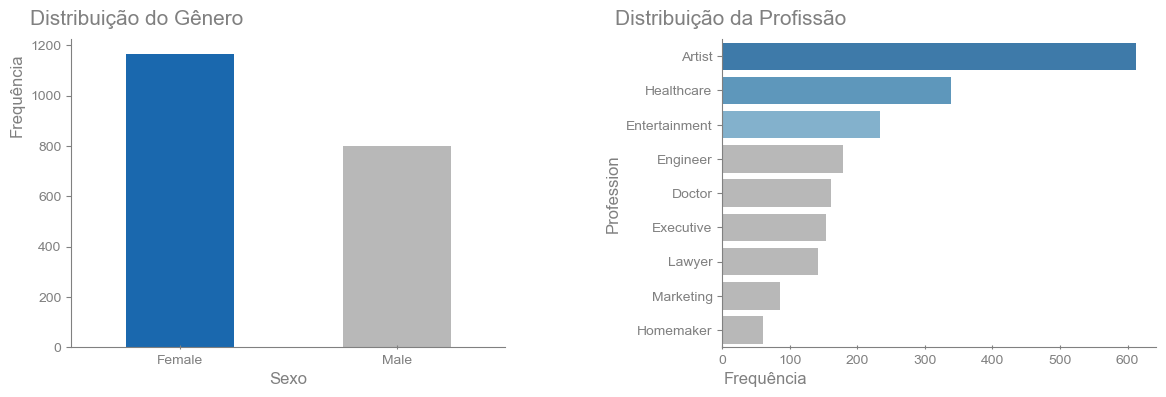

In [27]:
fig1, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot Gender
customer.Gender.value_counts().plot.bar(rot=0, color=[cmap_blue(200), cmap_gray(100)], ax=axes[0])
axes[0].set_title("Distribuição do Gênero", fontdict=font_title, **{'x':0.15, 'y':1.02})
axes[0].set_xlabel('Sexo', fontdict=font_label)
axes[0].set_ylabel('Frequência', fontdict=font_label, **{'x':0.15, 'y':0.82})

# Plot Profession
sns.countplot(data=customer, y='Profession', ax=axes[1], orient='v', 
              order=customer.Profession.value_counts().index,
              palette=[cmap_blue(180), cmap_blue(150), cmap_blue(120)] + (len(customer.Profession.value_counts()) - 3) * [cmap_gray(100)])
axes[1].set_title("Distribuição da Profissão", fontdict=font_title, **{'x':0.02, 'y':1.02})
axes[1].set_xlabel('Frequência', fontdict=font_label, x=0.1)
axes[1].set_ylabel('Profession', fontdict=font_label)

plt.subplots_adjust(wspace=0.5)
plt.show()

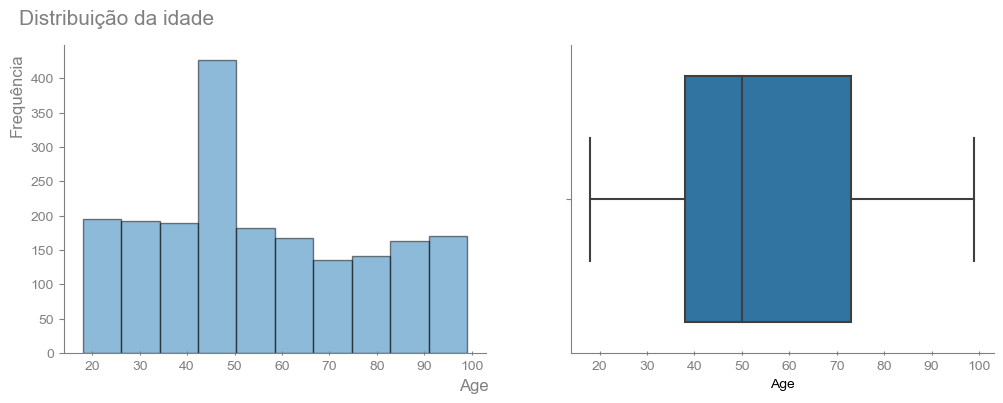

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 01: Histograma Idade
axes[0].hist(customer.Age, edgecolor='k', alpha=0.5)
axes[0].set_title("Distribuição da idade", fontdict=font_title, **{'x':0.125, 'y':1.04})
axes[0].set_xlabel('Age', fontdict=font_label, **{'x':0.97, 'y':1.02})
axes[0].set_ylabel('Frequência', fontdict=font_label, **{'x':0., 'y':0.84})

# Plot 02: Boxplot Idade
sns.boxplot(data=customer, x='Age', ax=axes[1])
axes[0].set_xlabel('Age', fontdict=font_label, **{'x':0.97, 'y':1.02})

plt.subplots_adjust(wspace=0.2)
plt.show()

In [29]:
# Pontuação de gasto
customer['Spending Score (1-100)'].agg([min, np.mean, max])

min       0.00
mean     51.08
max     100.00
Name: Spending Score (1-100), dtype: float64

In [30]:
customer['Annual Income ($)'].agg([min, np.mean, max])

min          0.00
mean    110616.01
max     189974.00
Name: Annual Income ($), dtype: float64

In [31]:
# Clientes por Experiência de Trabalho
frequencia = customer['Work Experience'].value_counts().sort_index()
percente = customer['Work Experience'].value_counts(1).sort_index()

print('{:16}| {:6}|{}'.format('Work Experience', 'Count', 'Percente'))
print(23 * '--')
for i, value in enumerate(frequencia.index):
    print('{:<16}| {:<6.0f}| {:>8.2%}'.format(value, frequencia.loc[value], percente.loc[value]))

Work Experience | Count |Percente
----------------------------------------------
0               | 424   |   21.58%
1               | 466   |   23.72%
2               | 61    |    3.10%
3               | 53    |    2.70%
4               | 121   |    6.16%
5               | 112   |    5.70%
6               | 119   |    6.06%
7               | 120   |    6.11%
8               | 164   |    8.35%
9               | 157   |    7.99%
10              | 83    |    4.22%
11              | 13    |    0.66%
12              | 16    |    0.81%
13              | 16    |    0.81%
14              | 16    |    0.81%
15              | 14    |    0.71%
16              | 5     |    0.25%
17              | 5     |    0.25%


In [32]:
# Número de membro da familia dos Clientes
frequencia = customer['Family Size'].value_counts().sort_index()
percente = customer['Family Size'].value_counts(1).sort_index()

print('{:12}| {:6}|{}'.format('Family Size', 'Count', 'Percente'))
print(23 * '--')
for i, value in enumerate(frequencia.index):
    print('{:<12}| {:<6.0f}| {:>8.2%}'.format(value, frequencia.loc[value], percente.loc[value]))

Family Size | Count |Percente
----------------------------------------------
1           | 294   |   14.96%
2           | 359   |   18.27%
3           | 308   |   15.67%
4           | 281   |   14.30%
5           | 252   |   12.82%
6           | 240   |   12.21%
7           | 226   |   11.50%
8           | 4     |    0.20%
9           | 1     |    0.05%


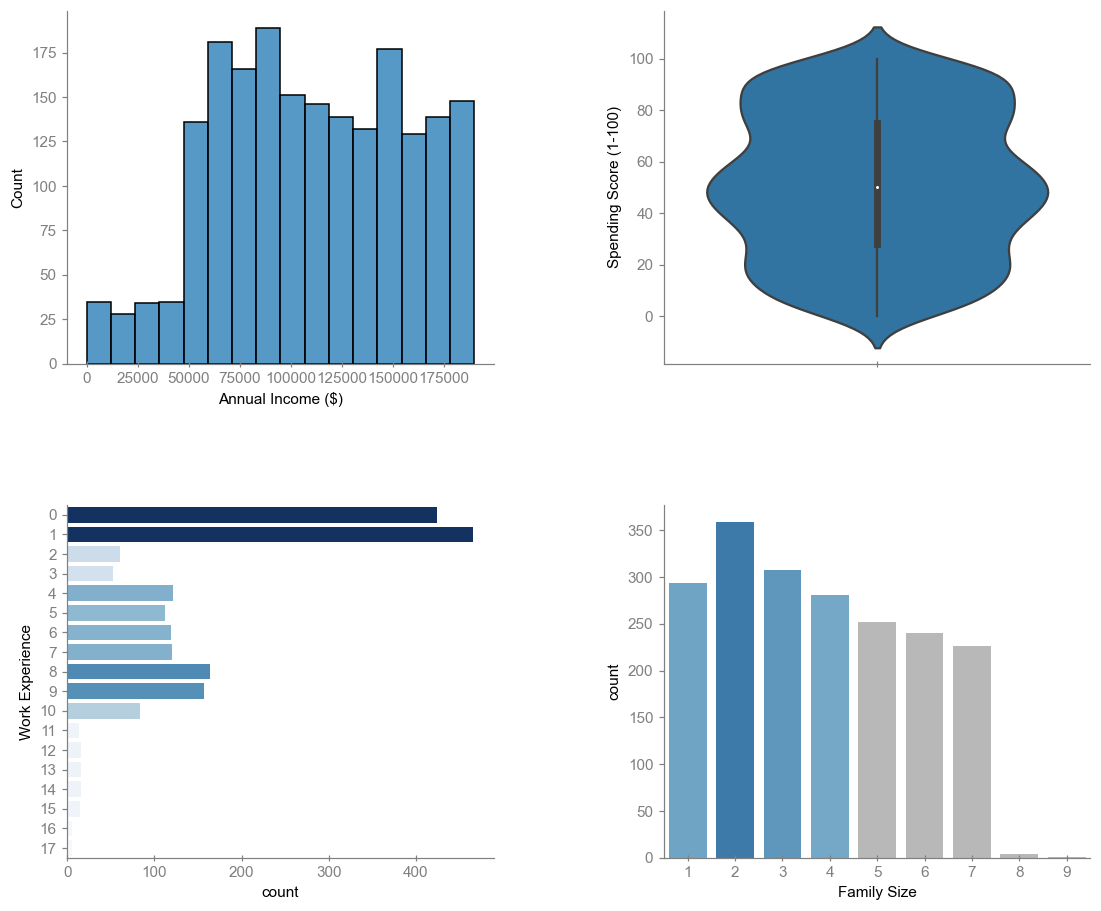

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=110)

sns.histplot(data=customer, x ='Annual Income ($)', ax=axes[0][0])
sns.violinplot(data=customer, y ='Spending Score (1-100)', ax=axes[0][1])
sns.countplot(data=customer, y='Work Experience', palette=[cmap_blue(value) for value in customer['Work Experience'].value_counts().sort_index().values], ax=axes[1][0])
sns.countplot(data=customer, x='Family Size', palette=[cmap_blue(135), cmap_blue(180), cmap_blue(150), cmap_blue(130)] + (len(customer['Family Size'].value_counts()) - 4) * [cmap_gray(100)], ax=axes[1][1])

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

* Para ajudar na análise, criarei outra coluna que trás informação sobre a classe em que a idade do cliente pertence.

In [34]:
condicoes = [
    (customer.Age < 18),
    ((customer.Age >= 18) & (customer.Age < 25)),
    ((customer.Age >= 25) & (customer.Age < 35)),
    ((customer.Age >= 35) & (customer.Age < 45)),
    ((customer.Age >= 45) & (customer.Age < 55)),
    ((customer.Age >= 55) & (customer.Age < 65)),
    ((customer.Age >= 65) & (customer.Age < 75)),
    ((customer.Age >= 75) & (customer.Age < 85)),
     (customer.Age > 84)]

classificacao = ['< 18', '[18 - 24]', '[25 - 34]', '[35 - 44]', '[45 - 54]', '[55 - 64]', '[65 - 74]', '[75 - 84]', '> 84']
customer['class_age'] = np.select(condicoes, classificacao, default=np.nan)

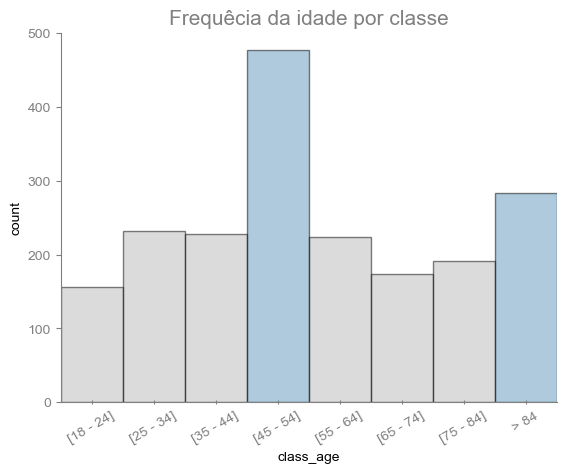

In [35]:
plt.title("Frequêcia da idade por classe", fontdict=font_title)
sns.countplot(data=customer, x = 'class_age', order=classificacao[1:], width=1., palette= 3 * [cmap_gray(100)] + [cmap_blue(150)] + 3 * [cmap_gray(100)] + [cmap_blue(150)], edgecolor='k', alpha=0.5)
plt.xticks(rotation=30)
plt.show()

OBSERVAÇÕES:

> 1. Aproximadamente, 59% dos clientes são mulheres.
> 2. As profissões mais comum são: Artista, Assistência Médica, Entretenimento.
> 3. Possuem clientes de toda faixa etária. Apartir de 18 anos.
> 4. O rendimento médio anual dos cliente é em torno de \\$110616.01
> 5. A pontuação de gasto média geral é em torno de 51
> 6. Os clientes possuem em sua maioria, entre 0 a 1 ano de experiência de trabalho.
> 7. Além disso, o tamanho da família de boa parte dos clientes estar entre 1 a 4 membros.

## 3.4 Análise Bivariada

* **Como será que varia o rendimento anual de acordo como o gênero? Como a Profissão?**

In [36]:
# Rendimento anual por gênenro
annualIncome_by_gender = customer.groupby('Gender').agg({'Annual Income ($)':['mean', 'median', 'min','max', skew]})
annualIncome_by_gender.T

Gender                       Female       Male
Annual Income ($) mean    110434.88  110880.34
                  median  111174.00  107879.00
                  min       1000.00       0.00
                  max     189974.00  189945.00
                  skew        -0.12      -0.11

In [37]:
# Pontuação de gasto por gênenro
spending_by_gender = customer.groupby('Gender').agg({'Spending Score (1-100)':['mean', 'median', 'min','max', skew]})
spending_by_gender.T

Gender                         Female    Male
Spending Score (1-100) mean     50.99   51.20
                       median   50.00   51.00
                       min       0.00    1.00
                       max     100.00  100.00
                       skew      0.03   -0.04

In [38]:
# Rendimento anual por profissão
annualIncome_by_profession = customer.groupby('Profession').agg({'Annual Income ($)':['mean', 'median', 'min','max', skew]}).sort_values(by=[('Annual Income ($)', 'mean')], ascending=True)
annualIncome_by_profession.T

Profession                Marketing  Homemaker     Artist  Entertainment  \
Annual Income ($) mean    107994.21  108758.62  108776.58      110650.33   
                  median  120899.00  100387.00  105211.00      109446.00   
                  min       5000.00   29000.00       0.00        1000.00   
                  max     186069.00  188696.00  189709.00      186882.00   
                  skew        -0.28       0.25      -0.05          -0.08   

Profession                   Lawyer   Engineer     Doctor  Healthcare  \
Annual Income ($) mean    110995.84  111161.24  111573.22   112574.04   
                  median  113338.50  112766.00  111871.00   111717.00   
                  min       3000.00    7000.00       0.00     3000.00   
                  max     189650.00  189974.00  189672.00   189689.00   
                  skew        -0.11      -0.16      -0.19       -0.13   

Profession                Executive  
Annual Income ($) mean    113770.13  
                  median  112957.00  
                  min       4000.00  
                  max     189630.00  
                  skew        -0.23

In [39]:
spending_by_profession = customer.groupby('Profession').agg({'Spending Score (1-100)':['mean', 'median', 'min', 'max']}).sort_values(by=('Spending Score (1-100)','mean'), ascending=True)
spending_by_profession.T

Profession                     Homemaker  Marketing  Lawyer  Engineer  \
Spending Score (1-100) mean        46.38      48.72   48.86     48.97   
                       median      45.50      46.00   49.00     47.00   
                       min          2.00       1.00    1.00      0.00   
                       max        100.00     100.00  100.00     99.00   

Profession                     Executive  Healthcare  Doctor  Artist  \
Spending Score (1-100) mean         49.9       50.52    51.9   52.68   
                       median       49.0       51.00    50.0   52.00   
                       min           1.0        1.00     1.0    1.00   
                       max          98.0      100.00   100.0  100.00   

Profession                     Entertainment  
Spending Score (1-100) mean            52.94  
                       median          53.00  
                       min              1.00  
                       max            100.00

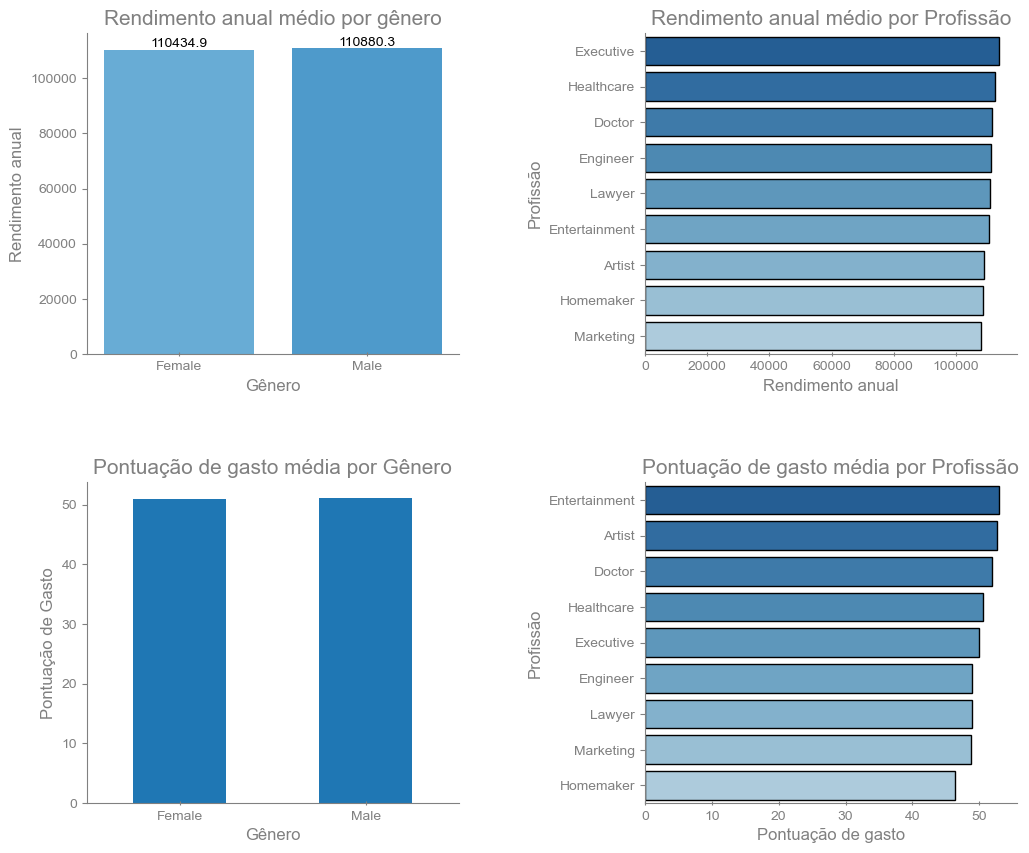

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 01
grafic01 = axes[0][0].bar(height=annualIncome_by_gender[('Annual Income ($)', 'mean')].values, x=annualIncome_by_gender[('Annual Income ($)', 'mean')].index, 
                          color=[cmap_blue(130), cmap_blue(150)])
axes[0][0].bar_label(grafic01, fmt="%.01f", size=10, label_type="edge")
axes[0][0].set_title("Rendimento anual médio por gênero", fontdict=font_title)
axes[0][0].set_xlabel('Gênero', fontdict=font_label)
axes[0][0].set_ylabel('Rendimento anual', fontdict=font_label)


# Plot 02
sns.barplot(data=annualIncome_by_profession.stb.flatten(), x='Annual Income ($)_mean', y='Profession', edgecolor='k', ax=axes[0][1],
            palette=[cmap_blue(i) for i in range(210, 80, -15)], 
            order=annualIncome_by_profession.stb.flatten().sort_values('Annual Income ($)_mean', ascending=False)['Profession'].values)
axes[0][1].set_title("Rendimento anual médio por Profissão", fontdict=font_title)
axes[0][1].set_xlabel('Rendimento anual', fontdict=font_label)
axes[0][1].set_ylabel('Profissão', fontdict=font_label)

# Plot 03
spending_by_gender[('Spending Score (1-100)', 'mean')].plot.bar(rot=0, ax=axes[1][0])
axes[1][0].set_title("Pontuação de gasto média por Gênero", fontdict=font_title)
axes[1][0].set_ylabel('Pontuação de Gasto', fontdict=font_label)
axes[1][0].set_xlabel('Gênero', fontdict=font_label)


# Plot 04
sns.barplot(data=spending_by_profession.stb.flatten(), x='Spending Score (1-100)_mean', y='Profession', edgecolor='k', ax=axes[1][1],
            palette=[cmap_blue(i) for i in range(210,80,-15)], 
            order=spending_by_profession.stb.flatten().sort_values('Spending Score (1-100)_mean', ascending=False)['Profession'].values)
axes[1][1].set_title("Pontuação de gasto média por Profissão", fontdict=font_title)
axes[1][1].set_ylabel('Profissão', fontdict=font_label)
axes[1][1].set_xlabel('Pontuação de gasto', fontdict=font_label)

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

In [42]:
annual_classAge = customer.groupby('class_age').agg({'Annual Income ($)':['mean', 'median', 'min', 'max', skew]}).sort_values(by=[('Annual Income ($)', 'mean')], ascending=True)
annual_classAge[('Annual Income ($)', 'mean')]

class_age
[25 - 34]    102439.20
[18 - 24]    104695.19
[35 - 44]    106605.66
[65 - 74]    108177.79
[45 - 54]    113399.79
[55 - 64]    113500.88
[75 - 84]    113977.26
> 84         116041.24
Name: (Annual Income ($), mean), dtype: float64

In [43]:
spending_by_classAge = customer.groupby('class_age').agg({'Spending Score (1-100)':['mean', 'median', 'min', 'max', skew]}).sort_values(by=[('Spending Score (1-100)', 'mean')], ascending=True)
spending_by_classAge

Spending Score (1-100)                          
                            mean median min  max      skew
class_age                                                 
[35 - 44]                  48.23   46.5   1   99  1.50e-01
[65 - 74]                  49.79   48.0   2   99  1.92e-01
> 84                       50.00   50.0   0  100  5.06e-02
[75 - 84]                  51.12   51.0   1   99 -4.82e-02
[18 - 24]                  51.27   49.5   1  100 -9.14e-03
[55 - 64]                  52.11   51.0   0  100  8.72e-03
[25 - 34]                  52.12   53.5   1  100 -1.08e-01
[45 - 54]                  52.48   52.0   1  100 -8.67e-02

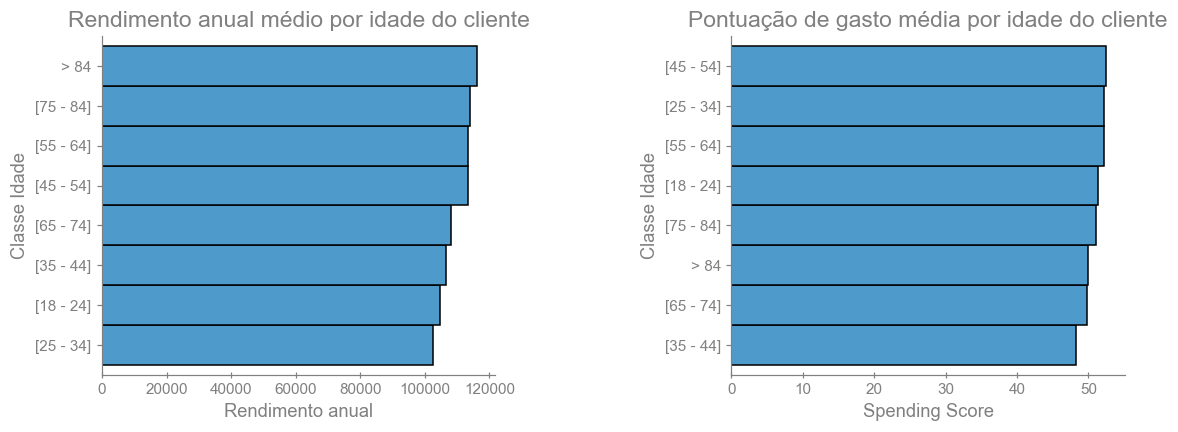

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=110)

annual_classAge[('Annual Income ($)', 'mean')].plot.barh(rot=0, ax=axes[0], color=[cmap_blue(150) for _ in annual_classAge[('Annual Income ($)', 'mean')]], width=1, edgecolor='k')
axes[0].set_title("Rendimento anual médio por idade do cliente", fontdict=font_title)
axes[0].set_ylabel('Classe Idade', fontdict=font_label)
axes[0].set_xlabel('Rendimento anual', fontdict=font_label)
axes[0].legend().remove()

spending_by_classAge[('Spending Score (1-100)', 'mean')].plot.barh(rot=0, ax=axes[1], color=[cmap_blue(150) for _ in spending_by_classAge[('Spending Score (1-100)', 'mean')]],  width=1, edgecolor='k')
axes[1].set_title("Pontuação de gasto média por idade do cliente", fontdict=font_title)
axes[1].set_ylabel('Classe Idade', fontdict=font_label)
axes[1].set_xlabel('Spending Score', fontdict=font_label)
axes[1].legend().remove()

plt.subplots_adjust(wspace=0.6)
plt.show()

In [45]:
count_by_profission = customer.groupby(['Gender','Profession']).agg({'Gender':'count'}).rename({'Gender':'Frequência'}, axis=1)
count_by_profission

Frequência
Gender Profession               
Female Artist                380
       Doctor                 89
       Engineer              103
       Entertainment         133
       Executive              87
       Healthcare            196
       Homemaker              39
       Lawyer                 86
       Marketing              53
Male   Artist                232
       Doctor                 72
       Engineer               76
       Entertainment         101
       Executive              66
       Healthcare            143
       Homemaker              21
       Lawyer                 56
       Marketing              32

* **Rendimento anual de acordo como o tamanho da familia?**

In [46]:
group_by_familySize = customer.groupby('Family Size').agg({'Family Size': ['count', 'mean', 'median', 'min', 'max'], 'Annual Income ($)': ['mean', 'median', 'min', 'max', skew], 
                                     'Spending Score (1-100)': ['mean', 'median', 'min', 'max', skew], 'Age': ['mean', 'median', 'min', 'max']})

group_by_familySize.T.round(2)

Family Size                            1          2          3          4  \
Family Size            count      294.00     359.00     308.00     281.00   
                       mean         1.00       2.00       3.00       4.00   
                       median       1.00       2.00       3.00       4.00   
                       min          1.00       2.00       3.00       4.00   
                       max          1.00       2.00       3.00       4.00   
Annual Income ($)      mean    108720.57  104455.97  106263.39  109233.37   
                       median  102824.50   97000.00  104556.00  111690.00   
                       min       2000.00       0.00       0.00    3000.00   
                       max     189974.00  188557.00  189369.00  189650.00   
                       skew        -0.08       0.01      -0.03      -0.28   
Spending Score (1-100) mean        49.62      50.51      51.91      52.78   
                       median      48.00      50.00      53.00      51.00   
                       min          1.00       1.00       2.00       1.00   
                       max        100.00     100.00     100.00     100.00   
                       skew         0.08      -0.03      -0.04       0.00   
Age                    mean        54.02      54.78      53.35      56.31   
                       median      50.00      49.00      48.00      54.00   
                       min         18.00      18.00      18.00      18.00   
                       max         99.00      99.00      99.00      99.00   

Family Size                            5          6          7          8  \
Family Size            count      252.00     240.00     226.00       4.00   
                       mean         5.00       6.00       7.00       8.00   
                       median       5.00       6.00       7.00       8.00   
                       min          5.00       6.00       7.00       8.00   
                       max          5.00       6.00       7.00       8.00   
Annual Income ($)      mean    114537.33  119161.38  117994.03   78607.75   
                       median  112094.50  120320.50  119365.50   64000.00   
                       min       4000.00    8000.00    4000.00   38000.00   
                       max     189945.00  189709.00  189672.00  148431.00   
                       skew        -0.07      -0.09      -0.08       0.91   
Spending Score (1-100) mean        52.52      49.89      50.48      49.25   
                       median      51.00      49.50      50.00      49.00   
                       min          0.00       1.00       1.00       0.00   
                       max        100.00     100.00      99.00      99.00   
                       skew        -0.10       0.03       0.06       0.02   
Age                    mean        55.87      57.51      57.13      49.25   
                       median      51.00      52.00      50.00      47.00   
                       min         18.00      18.00      18.00      45.00   
                       max         99.00      98.00      99.00      58.00   

Family Size                          9  
Family Size            count       1.0  
                       mean        9.0  
                       median      9.0  
                       min         9.0  
                       max         9.0  
Annual Income ($)      mean    30000.0  
                       median  30000.0  
                       min     30000.0  
                       max     30000.0  
                       skew        NaN  
Spending Score (1-100) mean       17.0  
                       median     17.0  
                       min        17.0  
                       max        17.0  
                       skew        NaN  
Age                    mean       43.0  
                       median     43.0  
                       min        43.0  
                       max        43.0

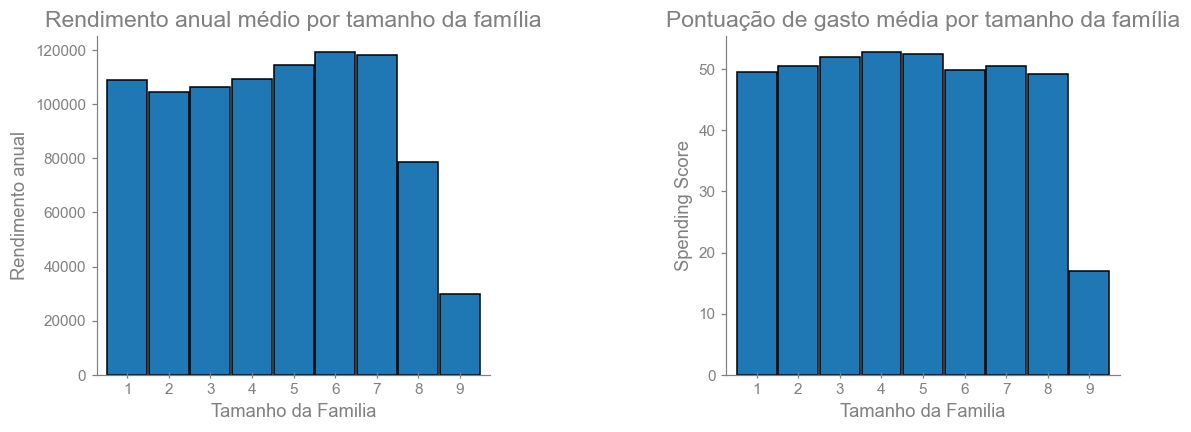

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=110)

group_by_familySize[('Annual Income ($)', 'mean')].plot.bar(rot=0, ax=axes[0], width=0.96, edgecolor='k')
axes[0].set_title("Rendimento anual médio por tamanho da família", fontdict=font_title)
axes[0].set_ylabel('Rendimento anual', fontdict=font_label)
axes[0].set_xlabel('Tamanho da Familia', fontdict=font_label)
axes[0].legend().remove()

group_by_familySize[('Spending Score (1-100)', 'mean')].plot.bar(rot=0, ax=axes[1], width=0.96, edgecolor='k')
axes[1].set_title("Pontuação de gasto média por tamanho da família", fontdict=font_title)
axes[1].set_xlabel('Tamanho da Familia', fontdict=font_label)
axes[1].set_ylabel('Spending Score', fontdict=font_label)
axes[1].legend().remove()

plt.subplots_adjust(wspace=0.6)
plt.show()

* **Qual o total de em cada profissão por gênero do cliente?**

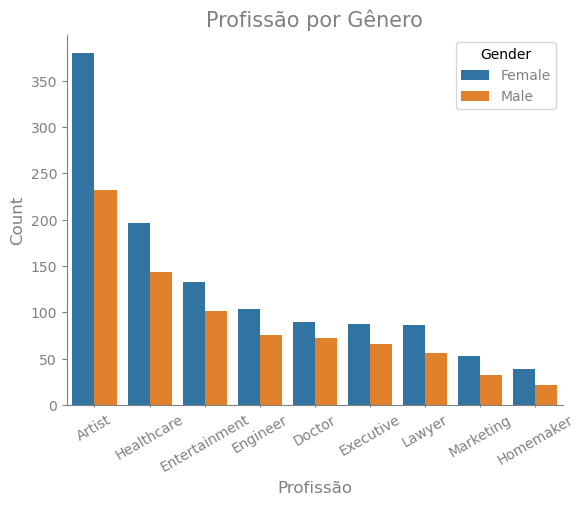

In [47]:
sns.countplot(data = customer,x="Profession",hue="Gender", hue_order=['Female', 'Male'], order=count_by_profission.loc[('Female')].sort_values(by='Frequência', ascending=False).index)
plt.title("Profissão por Gênero", fontdict=font_title)
plt.xlabel("Profissão", fontdict=font_label)
plt.ylabel("Count", fontdict=font_label)

plt.xticks(rotation=30)
plt.show()

In [48]:
ageMean_by_profession = customer.groupby('Profession').agg({'Age':['mean', 'median', 'max', 'min']}).sort_values(by=('Age','mean'), ascending=False)
ageMean_by_profession

Age                   
                mean median   max   min
Profession                             
Engineer       61.09   58.0  99.0  18.0
Entertainment  57.85   50.0  99.0  18.0
Doctor         55.27   48.0  98.0  18.0
Artist         55.12   47.0  99.0  18.0
Lawyer         54.65   48.0  99.0  18.0
Healthcare     54.28   47.0  99.0  18.0
Executive      53.12   45.0  99.0  18.0
Marketing      51.58   38.0  99.0  19.0
Homemaker      50.95   41.0  97.0  18.0

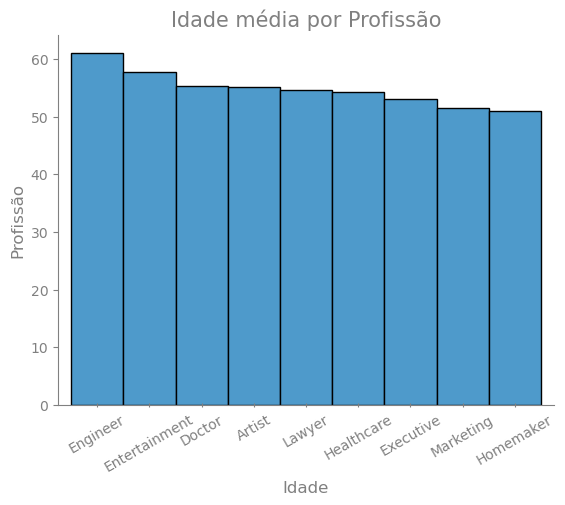

In [49]:
ageMean_by_profession[('Age', 'mean')].plot.bar(rot=30, color=[cmap_blue(150) for _ in annual_classAge[('Annual Income ($)', 'mean')]], width=1, edgecolor='k')
plt.title("Idade média por Profissão", fontdict=font_title)
plt.ylabel('Profissão', fontdict=font_label)
plt.xlabel('Idade', fontdict=font_label)
plt.show()

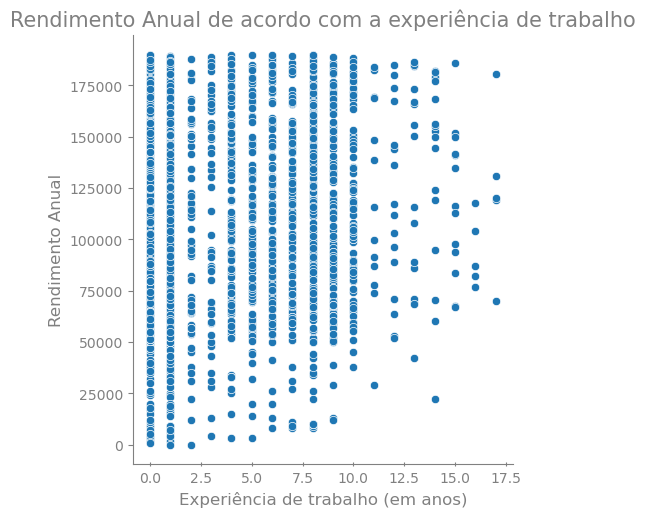

In [50]:
sns.relplot(data=customer, x='Work Experience', y='Annual Income ($)')
plt.title("Rendimento Anual de acordo com a experiência de trabalho", fontdict=font_title)
plt.xlabel("Experiência de trabalho (em anos)", fontdict=font_label)
plt.ylabel("Rendimento Anual", fontdict=font_label)
plt.show()

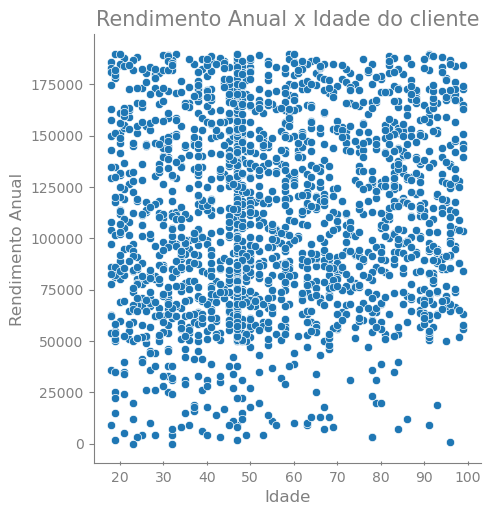

In [51]:
sns.relplot(data=customer, x='Age', y='Annual Income ($)')
plt.title("Rendimento Anual x Idade do cliente", fontdict=font_title)
plt.xlabel("Idade", fontdict=font_label)
plt.ylabel("Rendimento Anual", fontdict=font_label)
plt.show()

OBSERVAÇÕES:
> 1. O rendimento anual médio e a pontuação de gasto média dos clientes do sexo masculino, é levemente, maior.
> 2. O rendimento anual médio é maior para os clientes em que sua profissão é Entretenimento. As demais profissões são bem próximas,
> 3. Os cliente que são da área de Entretenimento, Artitas e Doutor, possuem a Pontuação de Gasto média, ligeiramente, maior que as demais profissões .
> 4. As donas de casa, possuem a menor pontuação de gasto média.
> 5. Os clientes que possuem entre 5 a 7 membros familiares, possuem mair rendimento anual médio. No entanto, os que possuem 3 a 5 membros, possuem maior pontuação de gasto média.
> 6. Os principais clientes são artistas
> 7. Aparentemente,o rendimento anual do cliente, não está tão relacionado aos anos de experiência de trabalho. Mas vale destacar que, para anos de experiência mais elevados, dificilmente você encontrará um cliente com rendimento anual baixo. Apedar disso, há cliente com pouca experiência, mas como um rendimento anual elevado.

## 3.5 Análise Multivariada

In [52]:
gender_by_annual = customer.groupby(['Gender', 'class_age']).agg({'Annual Income ($)':['mean']})
gender_by_annual

Annual Income ($)
                              mean
Gender class_age                  
Female > 84              116610.35
       [18 - 24]         103196.01
       [25 - 34]         101408.16
       [35 - 44]         110477.58
       [45 - 54]         112980.50
       [55 - 64]         111030.28
       [65 - 74]         108157.02
       [75 - 84]         112957.56
Male   > 84              115252.15
       [18 - 24]         106444.24
       [25 - 34]         104157.60
       [35 - 44]         101086.11
       [45 - 54]         114061.60
       [55 - 64]         117179.32
       [65 - 74]         108204.29
       [75 - 84]         115520.22

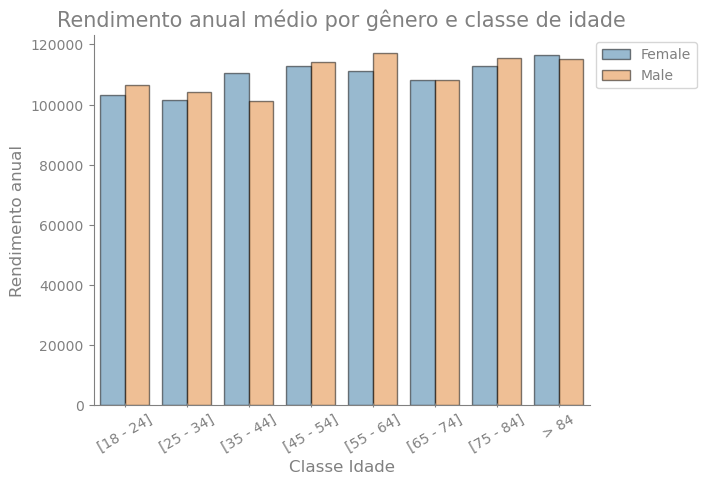

In [53]:
sns.barplot(data=gender_by_annual.stb.flatten(), x='class_age', y='Annual Income ($)_mean', hue='Gender', edgecolor='k', alpha=0.5, order=classificacao[1:])
plt.title("Rendimento anual médio por gênero e classe de idade", fontdict=font_title)
plt.xlabel('Classe Idade', fontdict=font_label)
plt.ylabel('Rendimento anual', fontdict=font_label)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [54]:
age_spending_by_gender = customer.groupby(['Gender', 'class_age']).agg({'Spending Score (1-100)':['mean']})
age_spending_by_gender

Spending Score (1-100)
                                   mean
Gender class_age                       
Female > 84                       54.22
       [18 - 24]                  50.18
       [25 - 34]                  51.59
       [35 - 44]                  48.70
       [45 - 54]                  51.14
       [55 - 64]                  49.65
       [65 - 74]                  51.51
       [75 - 84]                  49.64
Male   > 84                       44.15
       [18 - 24]                  52.54
       [25 - 34]                  53.01
       [35 - 44]                  47.55
       [45 - 54]                  54.60
       [55 - 64]                  55.78
       [65 - 74]                  47.61
       [75 - 84]                  53.34

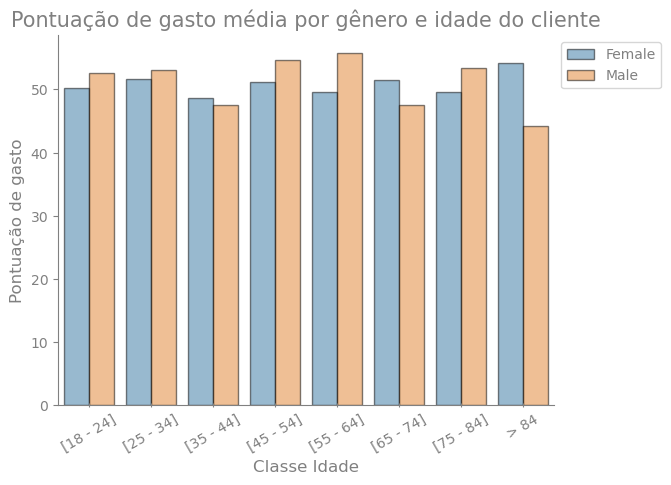

In [55]:
sns.barplot(data=age_spending_by_gender.stb.flatten(), x='class_age', y='Spending Score (1-100)_mean', hue='Gender', edgecolor='k', alpha=0.5, order=classificacao[1:])
plt.title("Pontuação de gasto média por gênero e idade do cliente", fontdict=font_title)
plt.xlabel('Classe Idade', fontdict=font_label)
plt.ylabel('Pontuação de gasto', fontdict=font_label)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

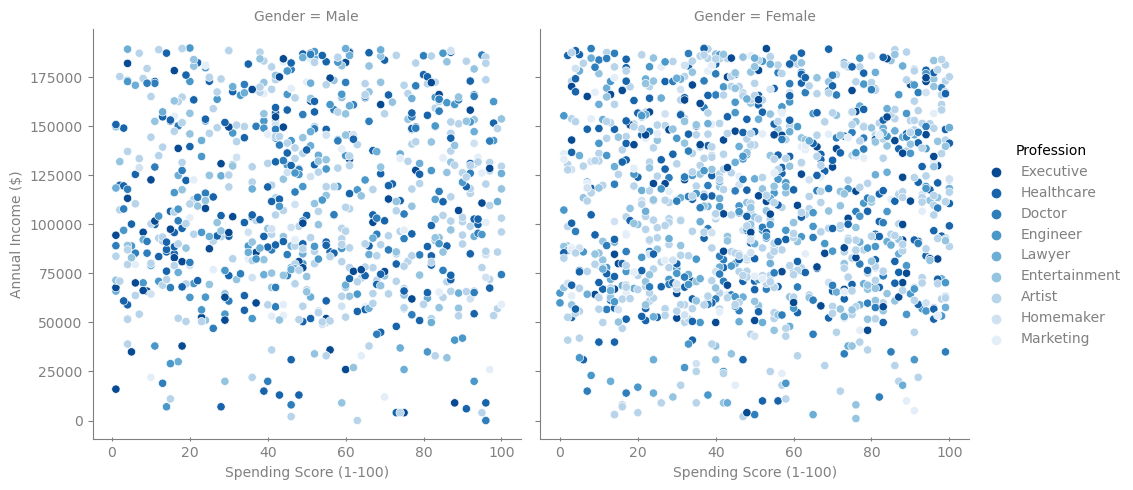

In [56]:
sns.relplot(data=customer, x="Spending Score (1-100)", y="Annual Income ($)", 
            col="Gender", 
            hue='Profession', 
            palette='Blues_r',
            hue_order=annualIncome_by_profession.stb.flatten().sort_values('Annual Income ($)_mean', ascending=False)['Profession'].values)

plt.show()

* **O rendimento anual é maior para clientes com idade mais avançada?**

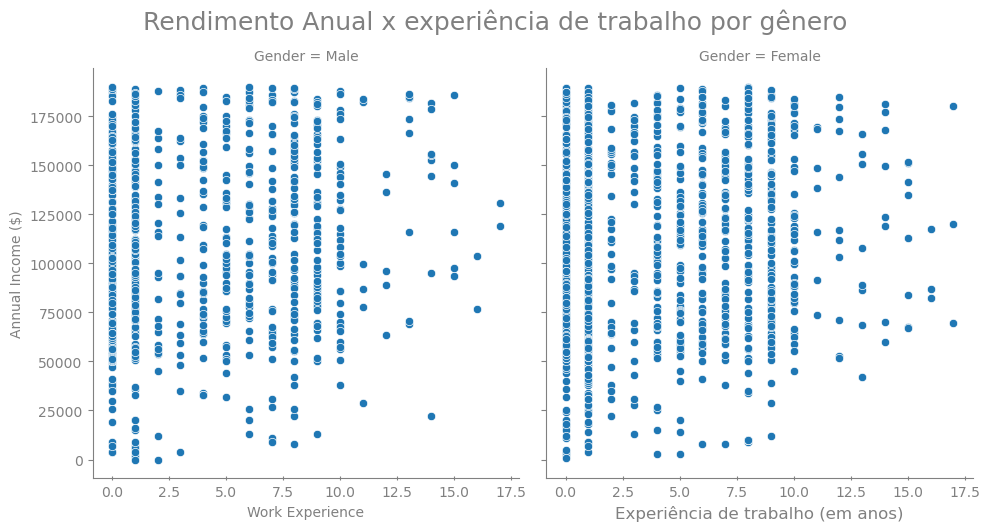

In [57]:
sns.relplot(data=customer, x='Work Experience', y='Annual Income ($)', col="Gender")
plt.suptitle("Rendimento Anual x experiência de trabalho por gênero", fontdict=font_title, y=1.05)
plt.xlabel("Experiência de trabalho (em anos)", fontdict=font_label)
plt.ylabel("Rendimento Anual", fontdict=font_label)

plt.show()

OBSERVAÇÕES:
> 1. O rendimento anual médio por gênenro é, aproximadamente, igual.
> 2. Aparentemente, os homens possui pontuação de gasto(Spending Score) maior que os das mulheres.
> 3. Os clietes com idades avançadas, tendem a terem maior rendimente anual. Mas também temos cliente novos com rendimento anual alto.

# 4. Conclusão
___

Portanto, antes de buscar atrair novos clientes, é preciso reter e manter os atuais clientes satisfeitos. Para isso, é fundamental compreender suas principais características por meio de análises, que servirão como base para uma possível tomada de decisão visando sua retenção. Assim, as principais características dos clientes dessa loja obtidas foram:

> * A maioria dos clientes são mulheres, cerca de 59%.
> * A profissão mais comum de nossos clientes é a de Artistas, médica e Entreternimento.
> * Possuem clientes de todas as idades, apartir de 18 anos.
> * O rendimento médio anual dos cliente é em torno de \\$110616.01 e a Pontuação de Gasto média geral é em torno de 51
> * Os clientes possuem em sua maioria, entre 0 a 1 ano de experiência de trabalho.
> * O tamanho da familia de boa parte dos nosso clientes é entre 1 a 4.
> * O rendimento anual médio e a pontuação de gasto média dos clientes do sexo masculino, é levemente, maior.
> * As donas de casa, possuem a menor pontuação de gasto média.
> * O rendimento anual médio é maior para os clientes em que sua profissão é Entretenimento. As demais profissões são bem próximas;
> * Aparentemente,o rendimento anual do cliente, não está tão relacionado aos anos de experiência de trabalho. Mas vale destacar que, para anos de experiência mais elevados, dificilmente você encontrará um cliente com rendimento anual baixo. Apesar disso, há cliente com pouca experiência, mas como um rendimento anual elevado.
> * O rendimento anual médio por gênero é, aproximadamente, igual.
> * Os homens possuem maior pontuação de gasto do que as mulheres
> * Clientes com idades avançadas tendem a terem maior rendimento anual médio. Mas há também clientes novos com altos rendimentos anuais.